# Regresión Lineal Múltiple

Cada observación es un curso, y se busca cuáles variables explican mejor el porcentaje de deserción y el porcentaje de aprobación.

**Table of contents**<a id='toc0_'></a>    
- 1. [Importación de librerías y datos](#toc1_)    
- 2. [Porcentaje de abandono entre parcial 1 y parcial 2](#toc2_)    
- 3. [Porcentaje de aprobados](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Importación de librerías y datos](#toc0_)

In [1]:
import pandas as pd
import numpy as np
# import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from gplearn.genetic import SymbolicRegressor
from sympy import *
# from patsy import dmatrices
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import importlib

# Funciones para entrenar y evaluar los modelos.
# import lib_entrenar as le
 
import matplotlib.pyplot as plt

# Descomentar lo siguiente para generar gráficos pgf:

# %matplotlib inline
# import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
df_cursos = pd.read_csv("../datos/dataset_04-feateng-cursos.csv")
df_cursos['SEDE'] = df_cursos['SEDE'].astype('str')
df_cursos['cuat'] = df_cursos['cuat'].astype('str')
df_cursos['MATERIA'] = df_cursos['MATERIA'].astype('str')
df_cursos['sala'] = df_cursos['sala'].astype('str')
print("Cantidad de cursos:", len(df_cursos))
df2 = df_cursos.loc[(df_cursos['valido2'] == 1) &
                    (df_cursos['abandona1_p'] < 1)].copy()
print("Cantidad de cursos válidos:", len(df2))
df2.sample(5)

Cantidad de cursos: 2664
Cantidad de cursos válidos: 1763


,anio,cuat,SEDE,MATERIA,curso,turno,n_alum,p_ext,p_recursa,sala,pa1_prom,pa2_prom,final_prom,prom_edad,abandona1_p,abandona2_p,valido1,valido2,aprueba_p,aprueba_rel_p
92,2011,1,5,3,92,B,41,0.146341,0.000000,56,5.655172,5.476190,2.800000,3.609756,0.292683,0.275862,1,1,0.463415,0.655172
2121,2018,1,4,53,2120,B,102,0.019608,0.019608,48,3.669492,4.533333,NaN,3.088235,0.421569,0.237288,1,1,0.274510,0.474576
2122,2018,1,5,3,2134,C,111,0.135135,0.477477,51,4.543860,4.642857,2.928571,3.315315,0.486486,0.263158,1,1,0.270270,0.526316
476,2012,2,2,53,476,B,61,0.114754,0.016393,22,4.431034,5.714286,6.029412,3.163934,0.049180,0.034483,1,1,0.819672,0.862069
825,2013,2,1,3,719,C,51,0.176471,0.490196,10,6.272727,4.363636,NaN,3.647059,0.568627,0.000000,1,1,0.352941,0.818182


## 2. <a id='toc2_'></a>[Porcentaje de abandono entre parcial 1 y parcial 2](#toc0_)

In [3]:
df2 = df_cursos.loc[(df_cursos['valido2'] == 1) &
                    (df_cursos['abandona1_p'] < 1)].copy()
df2['n_alum_scaled'] = MinMaxScaler().fit_transform(np.array(df2['n_alum']).reshape(-1,1))
df2['prom_edad_scaled'] = MinMaxScaler().fit_transform(np.array(df2['prom_edad']).reshape(-1,1))
df2 = df2.drop(['anio', 'curso', 'n_alum', 'prom_edad', 'pa2_prom',
                'aprueba_p', 'final_prom',
                'valido1', 'valido2'], axis=1)
# Sedes grandes y otras (O).
df2.loc[~df2['SEDE'].isin(['2','10','4','1','5','6']), 'SEDE'] = 'O'
df2.sample(5)

,cuat,SEDE,MATERIA,turno,p_ext,p_recursa,sala,pa1_prom,abandona1_p,abandona2_p,aprueba_rel_p,n_alum_scaled,prom_edad_scaled
713,1,O,3,C,0.056604,0.037736,126,3.457447,0.113208,0.361702,0.319149,0.254902,0.440252
2478,1,5,53,A,0.129412,0.223529,64,3.486111,0.152941,0.222222,0.500000,0.411765,0.388100
303,1,1,53,A,0.160000,0.520000,0,3.517857,0.253333,0.303571,0.428571,0.362745,0.520307
2456,1,O,53,C,0.014388,0.453237,187,2.906542,0.230216,0.289720,0.327103,0.676471,0.431241
348,1,4,3,C,0.103448,0.413793,35,3.882353,0.413793,0.000000,0.352941,0.137255,0.513278


In [81]:
res = smf.ols(formula='abandona2_p ~ n_alum_scaled', data=df2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            abandona2_p   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           0.000251
Time:                        02:08:29   Log-Likelihood:                 1143.6
No. Observations:                1763   AIC:                            -2283.
Df Residuals:                    1761   BIC:                            -2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2109      0.008     24.879      0.000       0.194       0.228
n_alum_scaled     0.0664      0.018      3.669      0.000       0.031       0.102
==============================================================================
Omnibus:                       79.706   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.352
Skew:                           0.304   Prob(JB):                     5.57e-36
Kurtosis:                       4.357   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Sin sala
definicion = 'abandona2_p ~ cuat + MATERIA + SEDE + turno + n_alum_scaled'
definicion = definicion + ' + p_ext + p_recursa + prom_edad_scaled'
definicion = definicion + ' + MATERIA:SEDE + MATERIA:turno + SEDE:turno'
definicion = definicion + ' + SEDE:p_ext + SEDE:n_alum_scaled'
res = smf.ols(formula=definicion, data=df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            abandona2_p   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     7.406
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           1.12e-47
Time:                        10:44:19   Log-Likelihood:                 1322.4
No. Observations:                1763   AIC:                            -2535.
Df Residuals:                    1708   BIC:                            -2234.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [8]:
df2.columns

Index(['cuat', 'SEDE', 'MATERIA', 'turno', 'p_ext', 'p_recursa', 'sala',
       'pa1_prom', 'abandona1_p', 'abandona2_p', 'aprueba_rel_p',
       'n_alum_scaled', 'prom_edad_scaled'],
      dtype='object')

In [21]:
# Sin SEDE
definicion = 'abandona2_p ~ cuat + MATERIA + turno + n_alum_scaled'
definicion = definicion + ' + p_ext + p_recursa + prom_edad_scaled + sala'
definicion = definicion + ' + MATERIA:turno + MATERIA:cuat + MATERIA:p_ext'
definicion = definicion + ' + sala:p_recursa'
res = smf.ols(formula=definicion, data=df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            abandona2_p   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     2.708
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           5.47e-34
Time:                        10:49:44   Log-Likelihood:                 1507.5
No. Observations:                1763   AIC:                            -2443.
Df Residuals:                    1477   BIC:                            -877.3
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Aprueba

Sin interacciones.

In [83]:
definicion = 'aprueba_rel_p ~ cuat + MATERIA + SEDE + turno + n_alum_scaled'
definicion = definicion + ' + p_ext + p_recursa + prom_edad_scaled + sala'
res = smf.ols(formula=definicion, data=df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          aprueba_rel_p   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.410
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           7.71e-71
Time:                        02:08:37   Log-Likelihood:                 1106.6
No. Observations:                1763   AIC:                            -1903.
Df Residuals:                    1608   BIC:                            -1055.
Df Model:                         154                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6180      0.047  

Con interacción entre sala y nalum.

In [23]:
definicion = 'aprueba_rel_p ~ cuat + MATERIA + turno + n_alum_scaled'
definicion = definicion + ' + p_ext + p_recursa + prom_edad_scaled + sala'
definicion = definicion + ' + MATERIA:n_alum_scaled'
# definicion = definicion + ' + sala:n_alum_scaled'
res = smf.ols(formula=definicion, data=df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          aprueba_rel_p   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.379
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           1.32e-70
Time:                        10:50:36   Log-Likelihood:                 1107.0
No. Observations:                1763   AIC:                            -1902.
Df Residuals:                    1607   BIC:                            -1048.
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Con interacción entre sala y nalum.

In [85]:
definicion = 'aprueba_rel_p ~ cuat + MATERIA + SEDE + turno + n_alum_scaled'
definicion = definicion + ' + p_ext + p_recursa + prom_edad_scaled + sala'
definicion = definicion + ' + MATERIA:SEDE + MATERIA:turno + SEDE:turno'
definicion = definicion + ' + SEDE:p_ext + sala:n_alum_scaled'
res = smf.ols(formula=definicion, data=df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          aprueba_rel_p   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3.988
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           2.25e-71
Time:                        02:09:06   Log-Likelihood:                 1286.3
No. Observations:                1763   AIC:                            -1945.
Df Residuals:                    1449   BIC:                            -225.6
Df Model:                         313                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## gplearn

Abandona

In [4]:
df2.columns

Index(['cuat', 'SEDE', 'MATERIA', 'turno', 'p_ext', 'p_recursa', 'sala',
       'pa1_prom', 'abandona1_p', 'abandona2_p', 'aprueba_rel_p',
       'n_alum_scaled', 'prom_edad_scaled'],
      dtype='object')

Sin sala

In [7]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5
}

X = df2.drop(['sala', 'pa1_prom', 'abandona1_p', 'abandona2_p', 'aprueba_rel_p'], axis=1)
X = pd.get_dummies(X, columns=['cuat', 'SEDE', 'MATERIA', 'turno'])
y = df2['aprueba_rel_p']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [8]:
# First Test
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']

est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                          feature_names=X_train.columns)
                          
est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify((est_gp._program), locals=converter)
next_e                           

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.72           1.4562        4         0.131719          0.12208     50.29s
   1     4.61         0.477652        5         0.127698          0.12815     53.16s
   2     3.02         0.348107        5         0.126259          0.14103     44.86s
   3     2.50         0.333158        5         0.125256         0.150015     43.23s
   4     1.63         0.231356        1         0.125617         0.147945     43.23s
   5     1.35         0.225812        1         0.124512         0.154058     38.86s
   6     1.28         0.197323        1         0.123875         0.163541     37.11s
   7     1.30         0.203026        1         0.123681         0.161503     36.34s
   8     1.28         0.205347        1          0.12397         0.158908  

/tmp/ipykernel_24394/2050606079.py:14: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'0.449'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  next_e = sympify((est_gp._program), locals=converter)


0.449000000000000

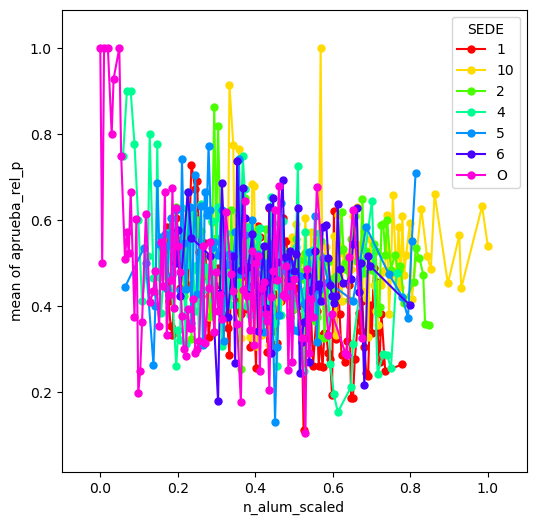

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=df2['n_alum_scaled'],
    trace=df2['SEDE'],
    response=df2['aprueba_rel_p'],
    # colors=["red", "blue"],
    # markers=["D", "^"],
    ms=10,
    ax=ax,
)


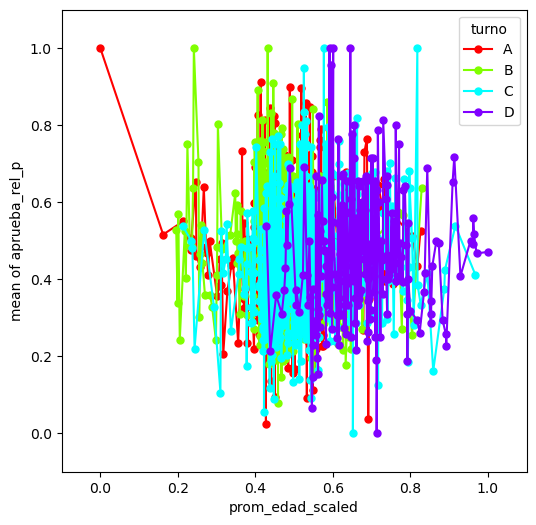

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=df2['prom_edad_scaled'],
    trace=df2['turno'],
    response=df2['aprueba_rel_p'],
    # colors=["red", "blue"],
    # markers=["D", "^"],
    ms=10,
    ax=ax,
)


In [39]:
res.params

Intercept        0.232453
cuat[T.2]       -0.028386
SEDE[T.10]      -0.045766
SEDE[T.13]      -0.158868
SEDE[T.14]       0.143430
SEDE[T.15]      -0.045322
SEDE[T.2]       -0.044305
SEDE[T.21]      -0.047518
SEDE[T.27]      -0.077581
SEDE[T.28]       0.054980
SEDE[T.30]      -0.074981
SEDE[T.31]      -0.099514
SEDE[T.32]      -0.064620
SEDE[T.33]      -0.005011
SEDE[T.34]      -0.093525
SEDE[T.35]       0.185441
SEDE[T.39]      -0.001703
SEDE[T.4]       -0.038639
SEDE[T.41]       0.040803
SEDE[T.42]      -0.012427
SEDE[T.5]       -0.029700
SEDE[T.6]       -0.044140
MATERIA[T.53]   -0.001393
n_alum           0.000558
dtype: float64

In [40]:
res.rsquared

0.08251426438105547

In [41]:
sm.stats.linear_rainbow(res)

(0.9904539702492614, 0.5563943826410489)

In [42]:
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

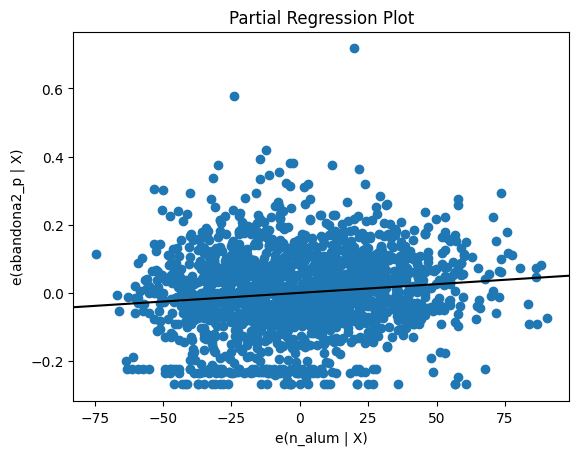

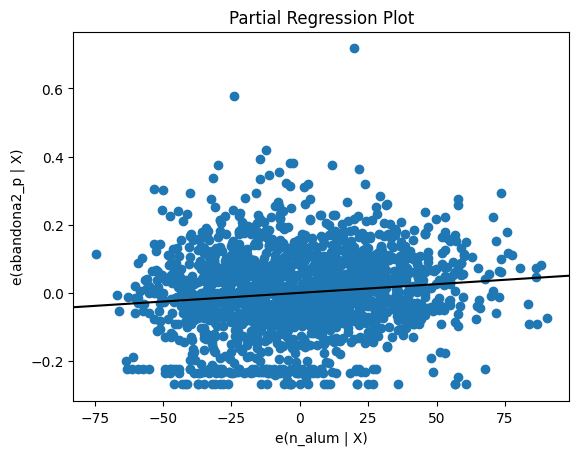

In [47]:
# sm.graphics.plot_partregress('abandona2_p', 'n_alum', ['Region', 'Literacy'], data=df3, obs_labels=False)
sm.graphics.plot_partregress('abandona2_p', 'n_alum', ['SEDE'], data=df3, obs_labels=False)

## 3. <a id='toc3_'></a>[Porcentaje de aprobados](#toc0_)

Respecto del número de estudiantes que tienen calificación en el parcial 1.